# Zomato Restuarant

## 1. Introduction:
This notebook implements two machine learning tasks using the Zomato dataset:
- **Task 1**: Predict the 'Average Cost for two' (a regression task).
- **Task 2**: Predict the 'Price range' (a classification task).

Only the **Zomato** dataset was available for analysis as the complementary country codes dataset was not accessible. During data loading, the `chardet` package was used to handle potential encoding issues since the dataset contained special characters, particularly in columns such as 'Cuisines'. This ensured proper decoding of data encoded in 'latin1'.

The following steps were performed: data cleaning, exploratory data analysis (EDA), preprocessing (including feature scaling and encoding), model training, evaluation, and hyperparameter tuning.

## 2. Data Preprocessing:
- **Missing values**: Handled missing values by filling 'Cuisines' with 'Unknown' and removing rows with missing values in critical columns.
- **Encoding**: Used `LabelEncoder` to convert categorical variables (e.g., 'Cuisines', 'City', 'Rating text', etc.) into numerical format. Binary columns like 'Has Table booking' were also label-encoded. OneHotEncoding was applied to nominal categorical columns (e.g., 'City', 'Cuisines', and 'Currency').
- **Feature Scaling**: Used `StandardScaler` to normalize numerical features like 'Average Cost for two', 'Longitude', 'Latitude', and 'Votes'.

## 3. Exploratory Data Analysis (EDA):
- **Visualization**: Conducted visualizations including distribution plots for 'Average Cost for two', count plots for 'Price range', pair plots for selected variables, and a correlation heatmap for numeric features.
- **Correlations**: Examined the correlation matrix to understand relationships between numeric variables.

## 4. Model Training and Evaluation:
Two tasks were addressed using various models:

### Task 1: Regression (Predicting 'Average Cost for two')
- Models used: 
  - `LinearRegression`
  - `DecisionTreeRegressor`
  - `RandomForestRegressor`
  - `XGBRegressor`

- **Performance Metrics**: Models were evaluated using Mean Squared Error (MSE) and R-squared score. `cross_val_score` was also applied for cross-validation.

### Task 2: Classification (Predicting 'Price range')
- Models used:
  - `DecisionTreeClassifier`
  - `RandomForestClassifier`
  - `SVC`
  - `XGBClassifier`

- **Performance Metrics**: Classification models were evaluated using `classification_report`, confusion matrices, and cross-validation for accuracy.

## 5. Hyperparameter Tuning:
- **XGBoost Regressor**: Performed hyperparameter tuning using `GridSearchCV` on the `XGBRegressor` model. The best parameters were found, and the final tuned model was evaluated based on MSE and R-squared scores.

## 6. Best Model Saving:
- After evaluating all regression models, the best-performing model (based on the lowest MSE) was saved using `pickle` for potential deployment or future use.

## 7. Findings:
- The RandomForest models performed competitively in both the regression and classification tasks.
- Hyperparameter tuning improved the performance of the XGBoost regressor.
- The final saved regression model had the lowest MSE, making it the optimal model for predicting 'Average Cost for two'.



In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.svm import SVR, SVC
import xgboost as xgb 
from xgboost import XGBRegressor, XGBClassifier
import pickle
import warnings
warnings.filterwarnings('ignore')


In [2]:
!pip install chardet
# Loading the datasets
zomato_data = pd.read_csv(r"C:\Users\sheba\Downloads\zomato.csv", encoding='latin1')
zomato_data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
# Check for data types
zomato_data.info()

# Check for missing  values
zomato_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [4]:
# Since 'Cuisines' column has missing values, fill them with 'Unknown' for now
zomato_data['Cuisines'].fillna('Unknown', inplace=True)

# Remove any rows with missing values in critical columns if necessary
zomato_data.dropna(subset=['Average Cost for two', 'Price range'], inplace=True)

# Verify missing values are handled
print(zomato_data.isnull().sum())

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


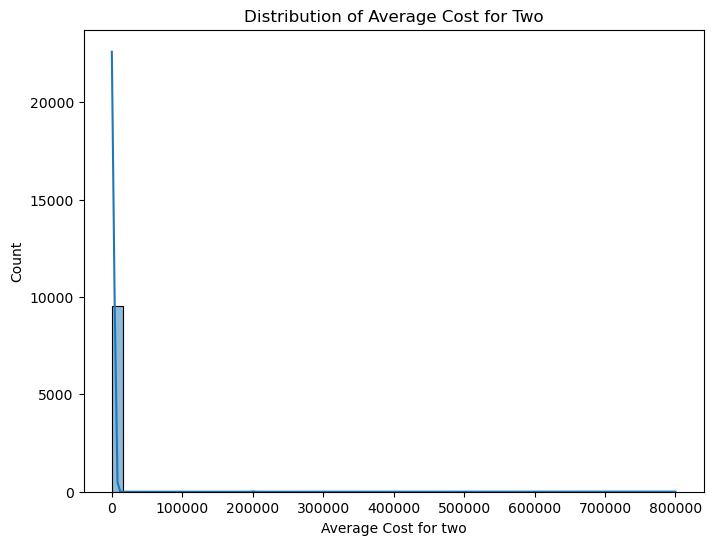

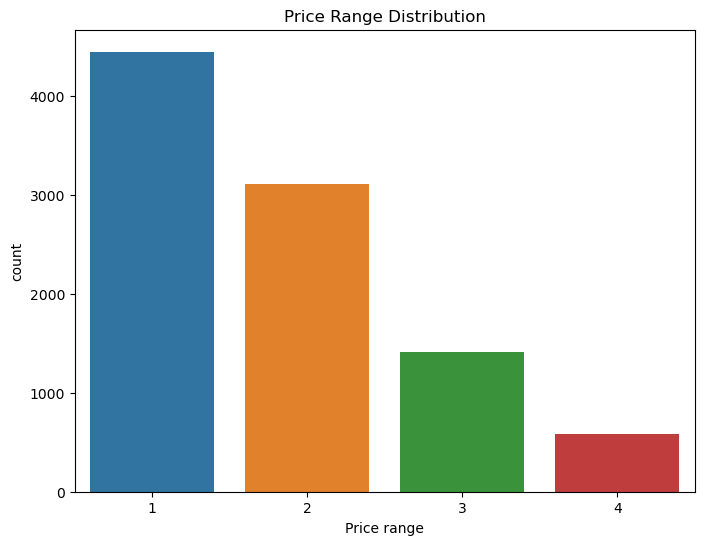

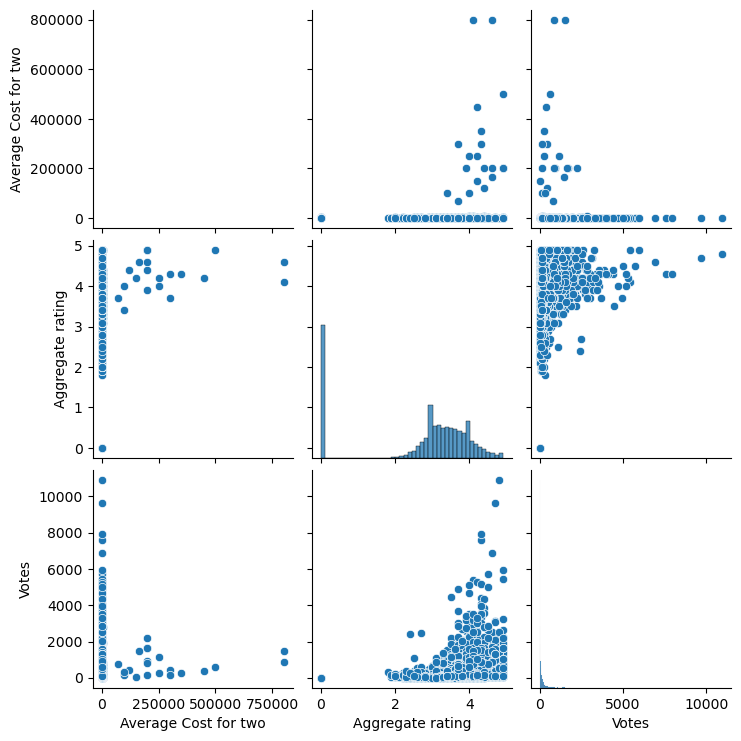

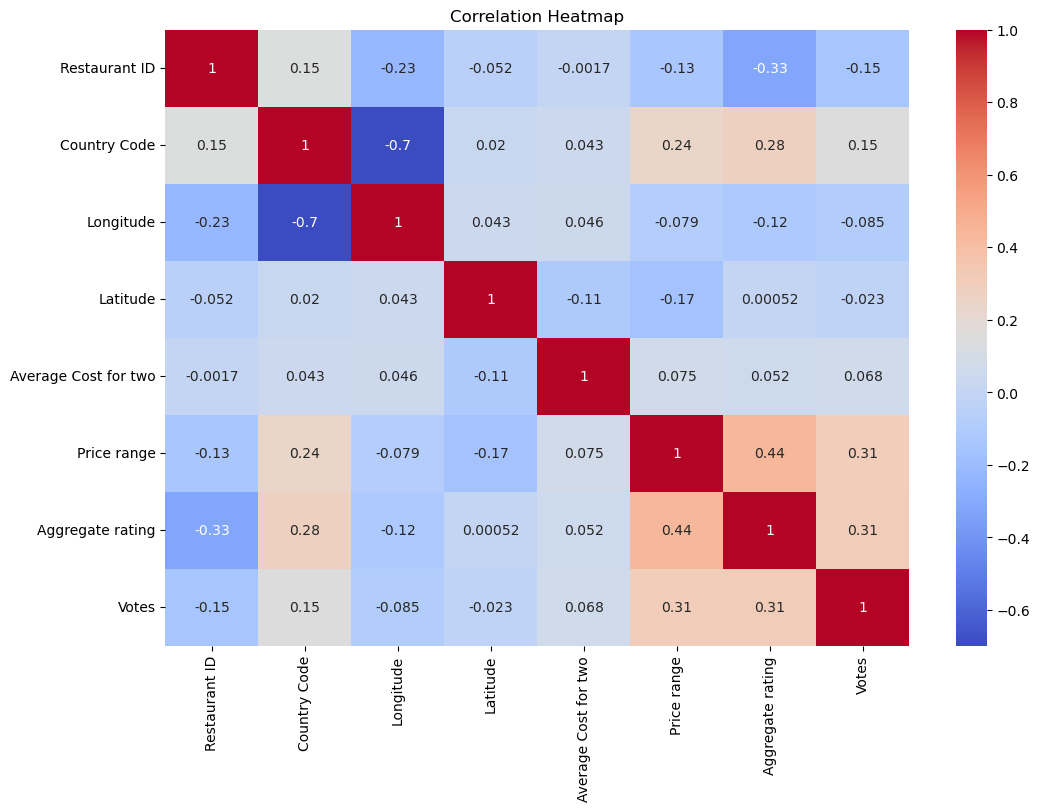

In [5]:
# Distribution of 'Average Cost for two'
plt.figure(figsize=(8, 6))
sns.histplot(zomato_data['Average Cost for two'], bins=50, kde=True)
plt.title('Distribution of Average Cost for Two')
plt.show()

# Select only numeric columns for the correlation matrix
numeric_data = zomato_data.select_dtypes(include=[np.number])

# Countplot for 'Price range'
plt.figure(figsize=(8, 6))
sns.countplot(x='Price range', data=zomato_data)
plt.title('Price Range Distribution')
plt.show()

# Pairplot for numeric variables
sns.pairplot(zomato_data[['Average Cost for two', 'Aggregate rating', 'Votes']])
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [6]:
# Encode categorical variables like 'Cuisines', 'City', and 'Country Code'
le = LabelEncoder()
zomato_data['Cuisines'] = le.fit_transform(zomato_data['Cuisines'])
zomato_data['City'] = le.fit_transform(zomato_data['City'])
zomato_data['Currency'] = le.fit_transform(zomato_data['Currency'])

# Drop unim columns
zomato_data.drop(['Restaurant Name', 'Address', 'Locality', 'Locality Verbose'], axis=1, inplace=True)


In [7]:
# Use LabelEncoder for binary categorical columns (Yes/No)
binary_columns = ['Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu']
label_encoder = LabelEncoder()

for col in binary_columns:
    zomato_data[col] = label_encoder.fit_transform(zomato_data[col])

# Check for other categorical columns that need encoding
print(zomato_data.select_dtypes(include='object').columns)


Index(['Rating color', 'Rating text'], dtype='object')


In [8]:
# Label encode 'Rating text and Rating color'
zomato_data['Rating text'] = label_encoder.fit_transform(zomato_data['Rating text'])
zomato_data['Rating color'] = label_encoder.fit_transform(zomato_data['Rating color'])

In [9]:
# Optional: OneHotEncode nominal categorical variables such as 'Cuisines', 'City', and 'Currency'
zomato_data = pd.get_dummies(zomato_data, columns=['Cuisines', 'City', 'Currency'], drop_first=True)

In [10]:
# Scaling numeric variables
scaler = StandardScaler()
zomato_data[['Average Cost for two', 'Longitude', 'Latitude', 'Votes']] = scaler.fit_transform(zomato_data[['Average Cost for two', 'Longitude', 'Latitude', 'Votes']])

In [11]:
# Define X and y for each task

# Task 1: Predicting 'Average Cost for two' (Regression)
X_reg = zomato_data.drop(['Average Cost for two', 'Price range'], axis=1)
y_reg = zomato_data['Average Cost for two']

# Task 2: Predicting 'Price range' (Classification)
X_clf = zomato_data.drop(['Price range', 'Average Cost for two'], axis=1)
y_clf = zomato_data['Price range'] - 1

# Train-test split for both tasks
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)


In [12]:
# List of models for regression
reg_models = {
    'LinearRegression': LinearRegression(),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=42),
    'RandomForestRegressor': RandomForestRegressor(random_state=42),
    'XGBRegressor': XGBRegressor(random_state=42)
}

# List of models for classification
clf_models = {
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42),
    'RandomForestClassifier': RandomForestClassifier(random_state=42),
    'SVC': SVC(),
    'XGBClassifier': XGBClassifier(random_state=42)
}

# Evaluate regression models
for name, model in reg_models.items():
    model.fit(X_train_reg, y_train_reg)
    predictions = model.predict(X_test_reg)
    mse = mean_squared_error(y_test_reg, predictions)
    r2 = r2_score(y_test_reg, predictions)
    print(f"{name} - MSE: {mse}, R2 Score: {r2}")

# Evaluate classification models
for name, model in clf_models.items():
    model.fit(X_train_clf, y_train_clf)
    predictions = model.predict(X_test_clf)
    print(f"{name} - Classification Report:")
    print(classification_report(y_test_clf, predictions))

LinearRegression - MSE: 0.47517516886189753, R2 Score: 0.6760145544065479
DecisionTreeRegressor - MSE: 1.0504159019034547, R2 Score: 0.2838020874454672
RandomForestRegressor - MSE: 0.6511938007231154, R2 Score: 0.5560009707571871
XGBRegressor - MSE: 1.3067849950011634, R2 Score: 0.10900369664868192
DecisionTreeClassifier - Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       907
           1       0.55      0.56      0.56       618
           2       0.52      0.51      0.51       266
           3       0.52      0.49      0.51       120

    accuracy                           0.64      1911
   macro avg       0.59      0.58      0.58      1911
weighted avg       0.64      0.64      0.64      1911

RandomForestClassifier - Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       907
           1       0.63      0.61      0.62       618
      

In [13]:
# Perform cross-validation for both regression and classification models
for name, model in reg_models.items():
    scores = cross_val_score(model, X_train_reg, y_train_reg, cv=5, scoring='neg_mean_squared_error')
    print(f"{name} - Cross-validated MSE: {np.mean(scores)}")

for name, model in clf_models.items():
    scores = cross_val_score(model, X_train_clf, y_train_clf, cv=5)
    print(f"{name} - Cross-validated Accuracy: {np.mean(scores)}")

LinearRegression - Cross-validated MSE: -96442.38322372494
DecisionTreeRegressor - Cross-validated MSE: -0.20941673686546797
RandomForestRegressor - Cross-validated MSE: -0.2942398128937385
XGBRegressor - Cross-validated MSE: -0.3494241115460164
DecisionTreeClassifier - Cross-validated Accuracy: 0.617801047120419
RandomForestClassifier - Cross-validated Accuracy: 0.6888743455497383
SVC - Cross-validated Accuracy: 0.487041884816754
XGBClassifier - Cross-validated Accuracy: 0.705759162303665


In [14]:
# Hyperparameter tuning for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 150],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# Create an XGBoost regressor model
xgb_model = XGBRegressor(random_state=42)

# Set up GridSearchCV
grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model to the training data
grid_search_xgb.fit(X_train_reg, y_train_reg)

# Get best parameters and model performance
print(f"Best parameters: {grid_search_xgb.best_params_}")
best_xgb_model = grid_search_xgb.best_estimator_

# Make predictions
predictions_xgb = best_xgb_model.predict(X_test_reg)

# Calculate and print performance metrics
mse = mean_squared_error(y_test_reg, predictions_xgb)
r2 = r2_score(y_test_reg, predictions_xgb)

print(f"Best XGBoost - MSE: {mse}")
print(f"Best XGBoost - R2: {r2}")

Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150, 'subsample': 0.8}
Best XGBoost - MSE: 1.154914657151281
Best XGBoost - R2: 0.212552413637769


In [15]:
# Initialize variables to track the best model
best_model = None
best_mse = float('inf')

# Evaluate all regression models and track the best one
for name, model in reg_models.items():
    model.fit(X_train_reg, y_train_reg)
    predictions = model.predict(X_test_reg)
    mse = mean_squared_error(y_test_reg, predictions)
    r2 = r2_score(y_test_reg, predictions)
    print(f"{name} - MSE: {mse}, R2 Score: {r2}")
    
    # Check if the current model is better (lower MSE)
    if mse < best_mse:
        best_mse = mse
        best_model = model

# Save the best model (after all models have been evaluated)
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print(f'Best model saved successfully with MSE: {best_mse}')


LinearRegression - MSE: 0.47517516886189753, R2 Score: 0.6760145544065479
DecisionTreeRegressor - MSE: 1.0504159019034547, R2 Score: 0.2838020874454672
RandomForestRegressor - MSE: 0.6511938007231154, R2 Score: 0.5560009707571871
XGBRegressor - MSE: 1.3067849950011634, R2 Score: 0.10900369664868192
Best model saved successfully with MSE: 0.47517516886189753
